# Pandas 시각화 응용 2

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('./data/data_airquality.csv')

df.shape

(576, 4)

In [8]:
# 미세먼지, 동부/서부, 경도, 위도
df.head(3)

,pm25,region,longitude,latitude
0,9.771185,east,-87.748260,30.592781
1,9.993817,east,-85.842858,33.265810
2,10.688618,east,-87.725960,34.731480


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pm25       576 non-null    float64
 1   region     576 non-null    object 
 2   longitude  576 non-null    float64
 3   latitude   576 non-null    float64
dtypes: float64(3), object(1)
memory usage: 18.1+ KB


In [10]:
df.tail(3)

,pm25,region,longitude,latitude
573,5.632587,west,-109.991147,42.750949
574,6.349710,west,-109.168198,41.640708
575,4.565808,west,-110.673534,43.612124


In [12]:
np.round(df.describe(), 2)

,pm25,longitude,latitude
count,576.00,576.00,576.00
mean,9.84,-91.65,38.56
std,2.28,15.76,5.12
min,3.38,-158.04,19.68
25%,8.55,-97.38,35.30
50%,10.05,-87.37,39.09
75%,11.36,-80.72,41.75
max,18.44,-68.26,64.82


- 결측치 없음 

- pm25 평균이 9.84 이다.



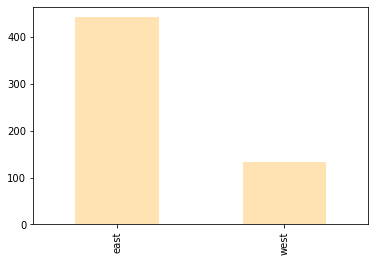

In [20]:
my_counts = df.region.value_counts()

my_counts.plot.bar(color='orange', alpha=0.3)
plt.show()

In [21]:
df2 = df[df.region == 'east']
df2.shape

(442, 4)

In [22]:
df3 = df[df.region == 'west']
df3.shape

(134, 4)

In [24]:
df4 = pd.DataFrame({"Counts": [df2.shape[0], df3.shape[0]]}, index=["East", "West"])

df4

,Counts
East,442
West,134


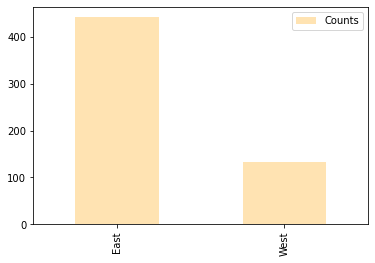

In [25]:
df4.plot.bar(color='orange', alpha=0.3)
plt.show()

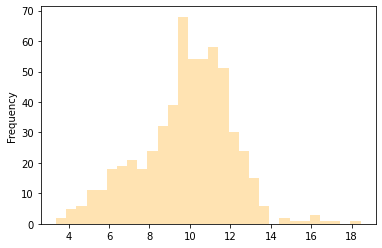

In [38]:
# 전체 pm25
df.pm25.plot.hist(bins=30, color='orange', alpha=0.3)
plt.show()

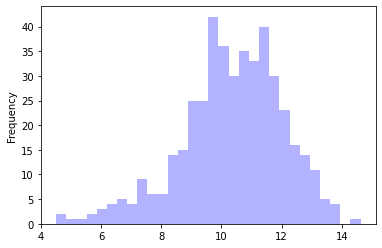

In [31]:
# 동부
df2.pm25.plot.hist(bins=30, color='blue', alpha=0.3)
plt.show()

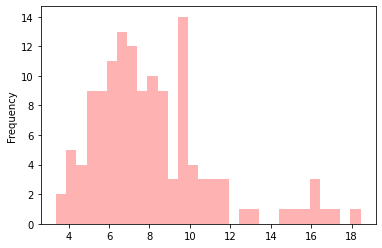

In [37]:
# 서부
df3.pm25.plot.hist(bins=30, color='red', alpha=0.3)
plt.show()

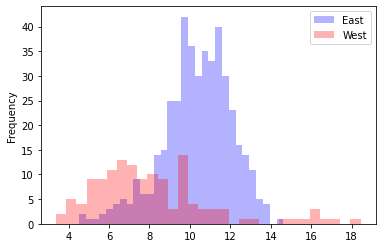

In [36]:
# 동부
df2.pm25.plot.hist(bins=30, color='blue', alpha=0.3, label='East')
# 서부
df3.pm25.plot.hist(bins=30, color='red', alpha=0.3, label='West')
plt.legend()
plt.show()

## 산점도

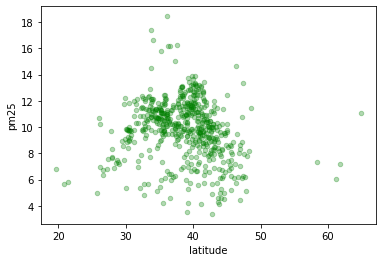

In [45]:
# 전체
df.plot.scatter(x='latitude', y='pm25', color='green', alpha=0.3, marker='o', s=20)
plt.show()

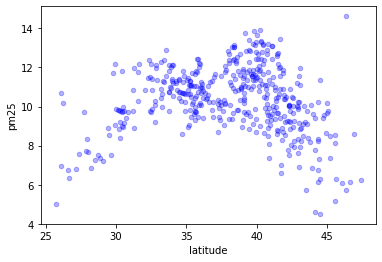

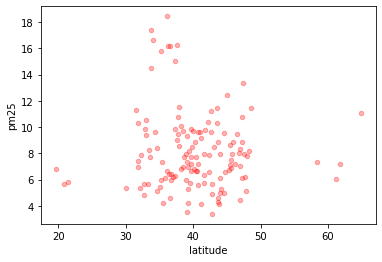

In [46]:
# 동부
df2.plot.scatter(x='latitude', y='pm25', color='blue', alpha=0.3, marker='o', s=20)

# 서부
df3.plot.scatter(x='latitude', y='pm25', color='red', alpha=0.3, marker='o', s=20)

plt.show()

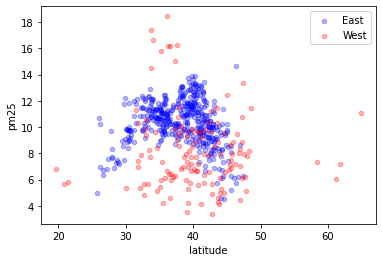

In [47]:
# 동부
base = df2.plot.scatter(x='latitude', y='pm25', color='blue', alpha=0.3, marker='o', s=20, label='East')

# 서부
df3.plot.scatter(x='latitude', y='pm25', color='red', alpha=0.3, marker='o', s=20, label='West', ax=base)

plt.show()

base

ax=base 

를 이용해 하나로 합칠 수 있다.

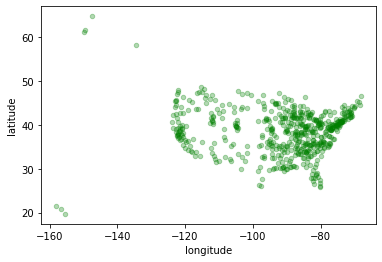

In [48]:
df.plot.scatter(x='longitude', y='latitude', color='green', alpha=0.3, marker='o', s=20)
plt.show()

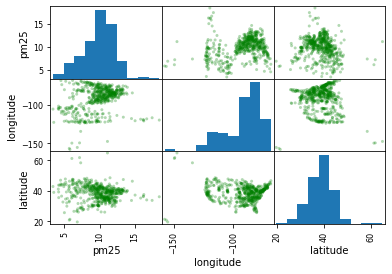

In [50]:
# 산점도 행렬
pd.plotting.scatter_matrix(df, color='green', alpha=0.3, marker='.')
plt.show()

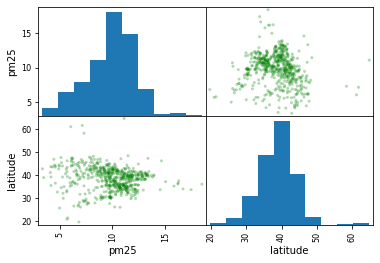

In [53]:
# 산점도 행렬_부분 만 보기
pd.plotting.scatter_matrix(df[['pm25', 'latitude']], color='green', alpha=0.3, marker='.')
plt.show()